In [39]:
import pyfits 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import astropy 
from astropy import cosmology 
import math as mt
from scipy.integrate import quad
from scipy.stats import chi2_contingency
from pylab import *
from scipy.optimize import curve_fit
import scipy as sp
import scipy.special
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from astropy.modeling.models import Sersic1D
from numpy import * 
#http://seaborn.pydata.org/generated/seaborn.regplot.html documentation 

In [116]:
#field data (_f)
f = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/field_size_n.txt', 'r')
lines = f.readlines()[1:]
f.close()

#create arrays 
f_re_er = [] 
f_re    = []
f_n     = []
f_n_er  = []
f_z     = []
f_dk    = []
f_lmass = []
f_flag  = []
f_ans_re_1 =[]
f_dk_p  = []
f_dk_n = []
f_re_kpca = []
f_ssmd = []

#pull array column 
for line in lines: 
    a = line.split()
    f_z.append(float(a[16]))
    f_re.append(float(a[6]))
    f_re_er.append(float(a[7]))
    f_n.append(float(a[8]))
    f_n_er.append(float(a[9]))
    f_dk.append(float(a[32]))
    f_lmass.append(float(a[21]))
    f_flag.append(float(a[36]))
    f_dk_p.append(float(a[33]))
    f_dk_n.append(float(a[34]))
    f_re_kpca.append(float(a[37]))
    f_ssmd.append(float(a[38]))

#assign arrays 
f_re    = np.array(f_re)
f_re_er = np.array(f_re_er)
f_n     = np.array(f_n)
f_n_er  = np.array(f_n_er)
f_z     = np.array(f_z)
f_dk    = np.array(f_dk)
f_lmass = np.array(f_lmass)
f_flag  = np.array(f_flag) #greater than 0.9 (1) is SF, less than is Q
f_dk_p  = np.array(f_dk_p)
f_dk_n  = np.array(f_dk_n)
f_re_kpca = np.array(f_re_kpca)
f_dk_err = (f_dk_p + f_dk_n)/2.
f_ssmd  = np.array(f_ssmd)

#stellar surface mass density = ssmd. originally integrated below, integrals inverterd, hence the (-1)
#equation for Sigma_1kpc = M_1kpc/pi*r^2
f_ssmd = f_lmass*f_ssmd**(-1)/np.pi
print f_ssmd

f_re_kpc = f_re*8.615 #arc to kpc
f_b = 1.9992*f_n - 0.3271 #value of b


#one way to calculate the integrals 
#for indexb in range(len(f_b)):
#    for indexre in range(len(f_re_kpc)):
#        for indexn in range(len(f_n)):
#            def f1(x):
#                return 2*np.pi*x*np.exp(-f_b[indexb]*((x/f_re_kpc[indexre])**(1/f_n[indexn])-1))
#            
                  
#            a1, erra1 = quad(f1, 0, 1)
#            b1, errb1 = quad(f1, 0, np.inf)
#            f_ssmd = b1/a1
#            f_ssmd = np.array(f_ssmd)
#            print f_ssmd






[ 0.43811053  0.16980583  0.21640859  0.1279882   0.07888659  0.53454265
  0.03931144  1.59270993  0.7364437   0.51416264  0.45460194  0.5691762
  3.07521049  0.15255321  0.85692394  0.09510773  0.89338367  1.94588367
  1.05141851  0.94102485  0.96792145  0.54343864  1.01966834  0.0682719
  0.29238883  0.90850791  1.22103254  0.20539178  0.85813198  0.51094029
  0.898522    0.91824136]


In [117]:
#IRC 0218 data (_c)
c = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/irc0218_size_n.txt', 'r')
lines = c.readlines()[1:]
c.close()

c_re_er = [] 
c_re    = []
c_n     = []
c_n_er  = []
c_z     = []
c_dk    = []
c_lmass = []
c_flag  = [] 
c_dk1   = []
c_dk2   = []
c_ssmd = []

for line in lines: 
    a = line.split()
    c_z.append(float(a[25]))
    c_re.append(float(a[6]))
    c_re_er.append(float(a[7]))
    c_n.append(float(a[8]))
    c_n_er.append(float(a[9]))
    c_dk.append(float(a[21]))
    c_lmass.append(float(a[30]))
    c_flag.append(float(a[36]))
    c_dk1.append(float(a[22]))
    c_dk2.append(float(a[23]))
    c_ssmd.append(float(a[37]))
    
c_re    = np.array(c_re)
c_re_er = np.array(c_re_er)
c_n     = np.array(c_n)
c_n_er  = np.array(c_n_er)
c_z     = np.array(c_z)
c_dk    = np.array(c_dk)
c_lmass = np.array(c_lmass)
c_flag  = np.array(c_flag)
c_dk1   = np.array(c_dk1)
c_dk2   = np.array(c_dk2)
c_ssmd  = np.array(c_ssmd)

c_ssmd = c_lmass*c_ssmd**(-1)/np.pi
print c_ssmd

c_re_kpc = c_re*8.615 #arc to kpc
c_b = 1.9992*c_n - 0.3271 #value of b


c_dk_err = (c_dk1 + c_dk2)/2.0



[ 1.62320827  0.9887373   0.88202442  1.55868121  1.04738073  0.35615733
  1.43855195  0.14054231  0.07902427  1.80965724  1.02877119  0.44466958
  0.35379686  1.64489659  0.57316985  0.10079117  0.13339684  1.3643156
  1.27633475  0.27747644  1.07685513  0.39698421  1.63132388  0.68666461]


In [85]:
#easier way to calculate the ratio of the integrals 
for i in range(0,24,1):
    def f1(x):
        return 2*np.pi*x*np.exp(-c_b[i]*((x/c_re_kpc[i])**(1/c_n[i])-1))
            
                  
    a1, erra1 = quad(f1, 0, 1)
    b1, errb1 = quad(f1, 0, np.inf)
    c_ssmd = b1/a1
    c_ssmd = np.array(c_ssmd)
    #print c_ssmd



Spearman Rank
-0.130367852929
-0.2
-0.127272727273
nan


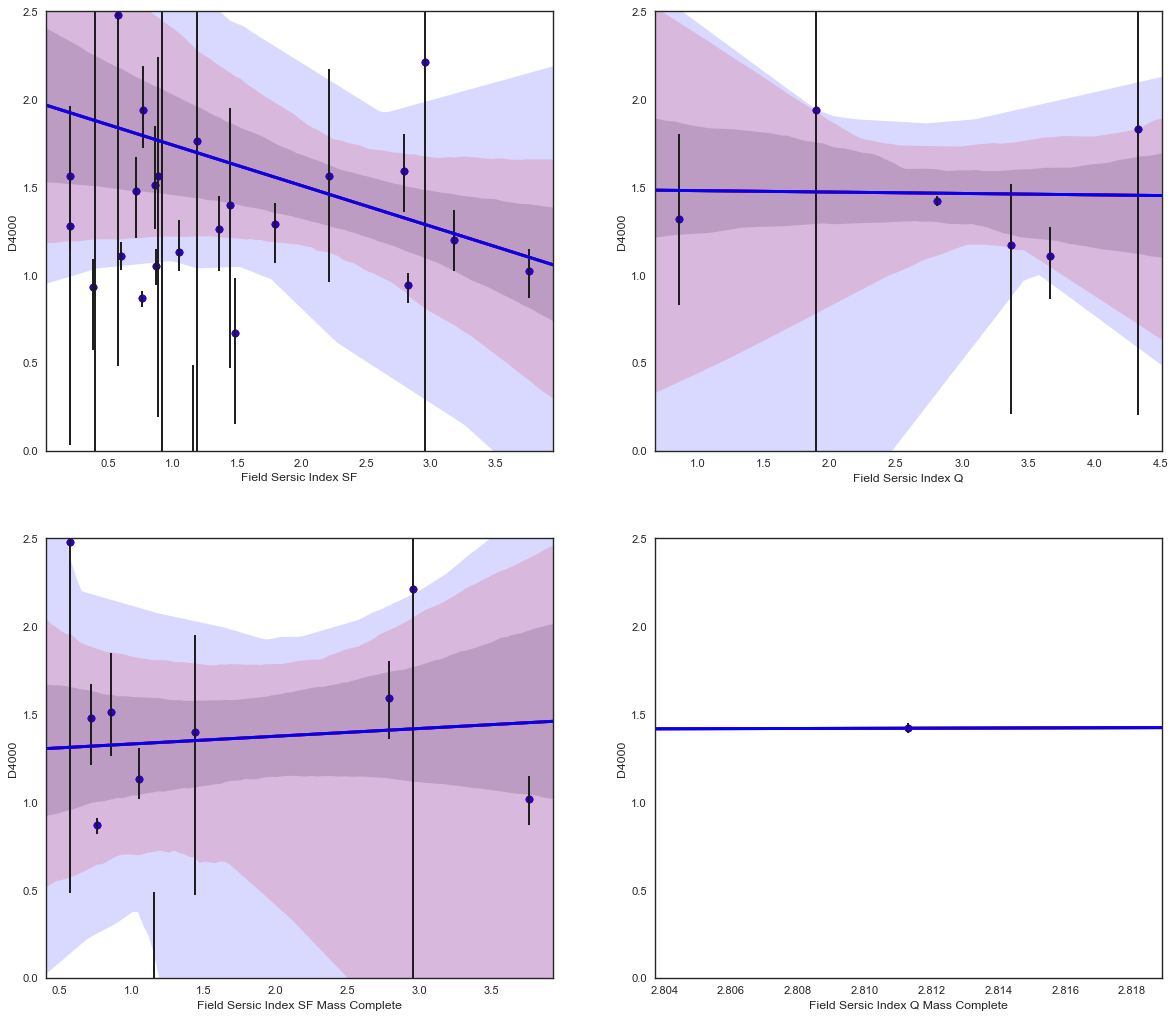

In [130]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(f_n[np.where(f_flag>0.9)], name="Field Sersic Index SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag>0.9)], f_dk_n[np.where(f_flag>0.9)]], facecolor='none')
print ("Spearman Rank")  
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(f_n[np.where(f_flag<0.9)], name="Field Sersic Index Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag<0.9)], f_dk_n[np.where(f_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(f_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field Sersic Index SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(f_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field Sersic Index Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()



0.333333333333
0.304635844062
0.142857142857
0.450468731348


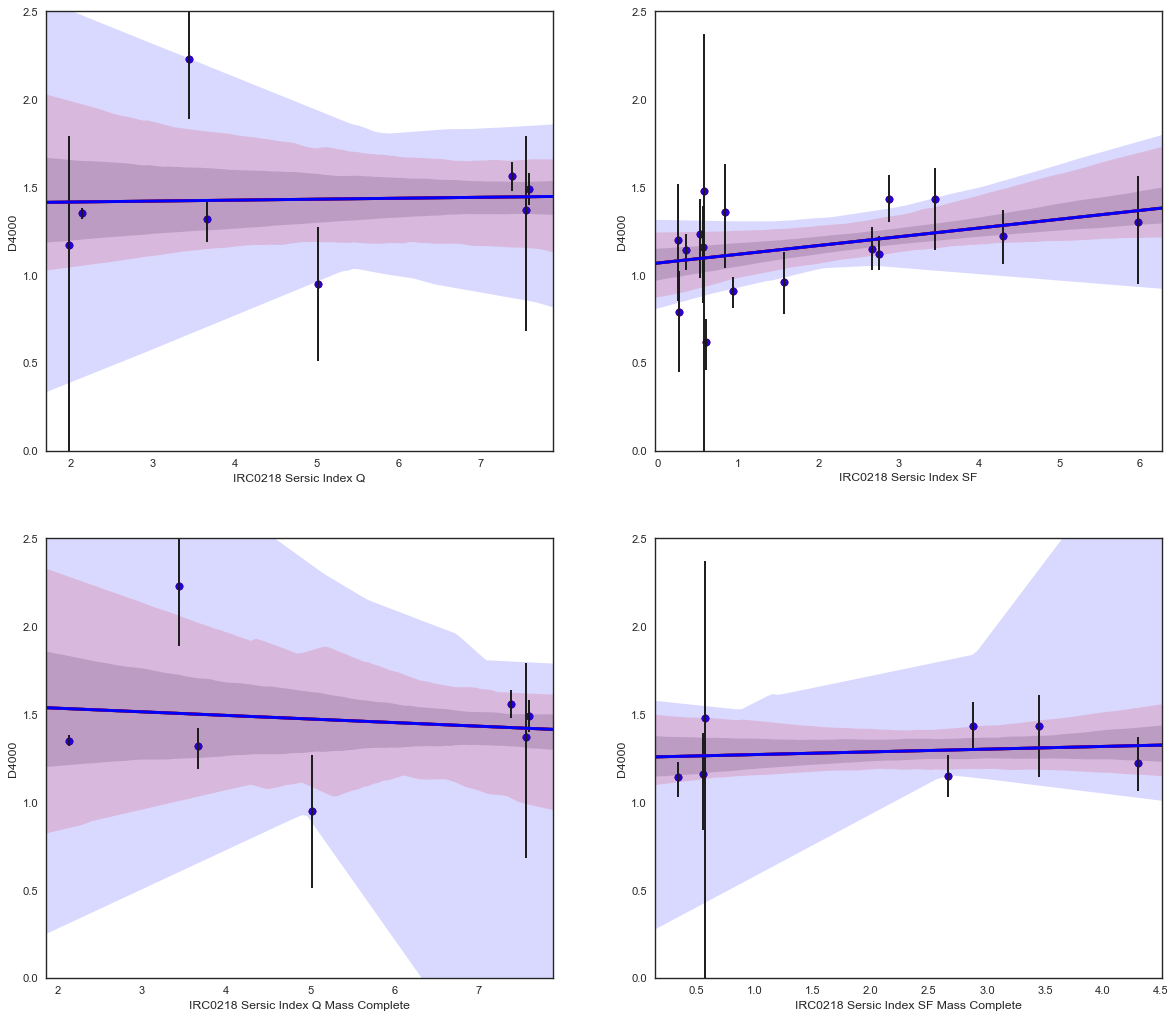

In [131]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_n[np.where(c_flag<0.9)], name="IRC0218 Sersic Index Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_n[np.where(c_flag>0.9)], name="IRC0218 Sersic Index SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_n[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 Sersic Index Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_n[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 Sersic Index SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()


-0.300718510352
-0.2
-0.115151515152
nan


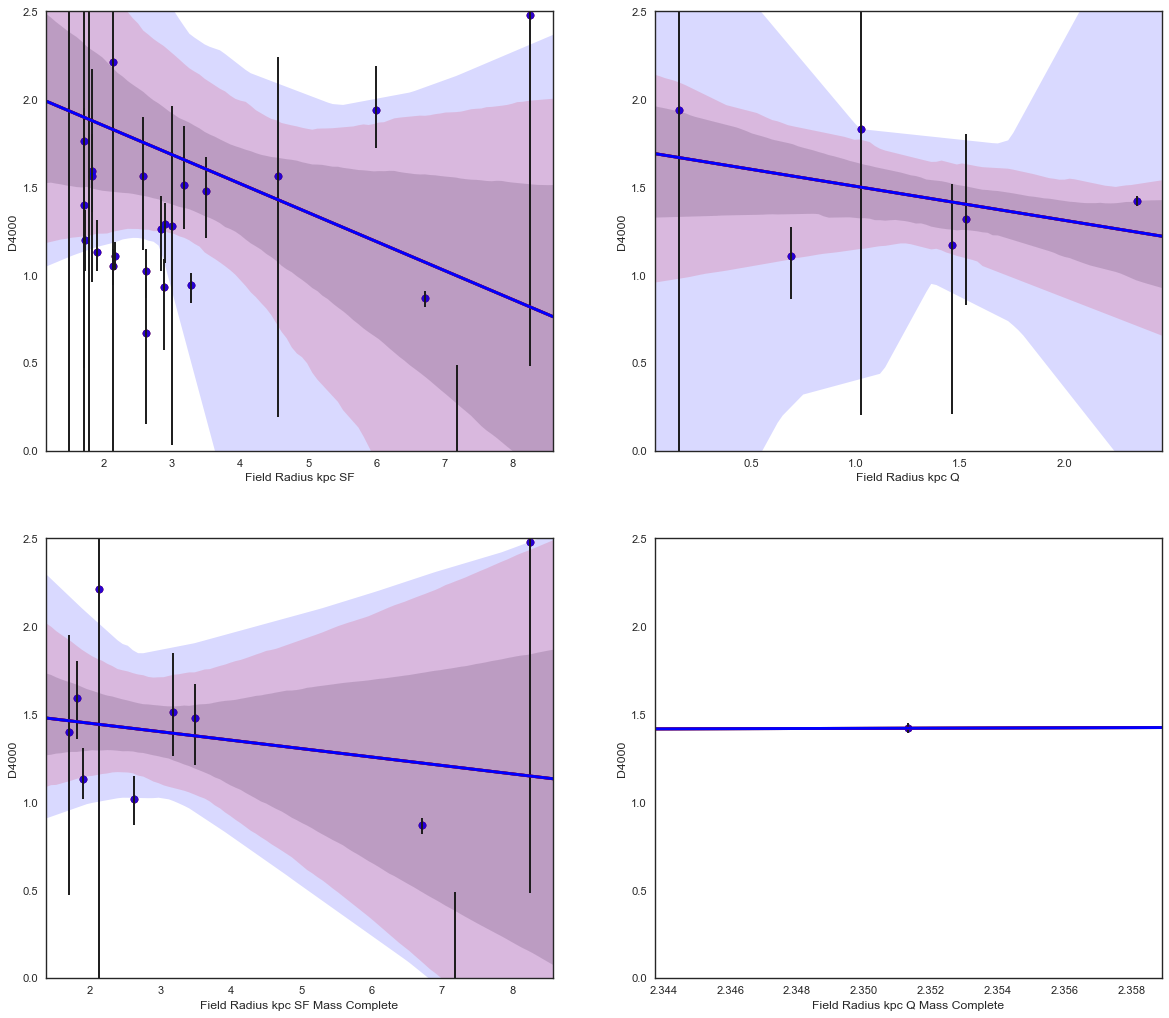

In [132]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(f_re_kpc[np.where(f_flag>0.9)], name="Field Radius kpc SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag>0.9)], f_dk_n[np.where(f_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(f_re_kpc[np.where(f_flag<0.9)], name="Field Radius kpc Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag<0.9)], f_dk_n[np.where(f_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(f_re_kpc[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field Radius kpc SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(f_re_kpc[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field Radius kpc Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

0.238095238095
0.223693953128
-0.0357142857143
-0.0900937462696


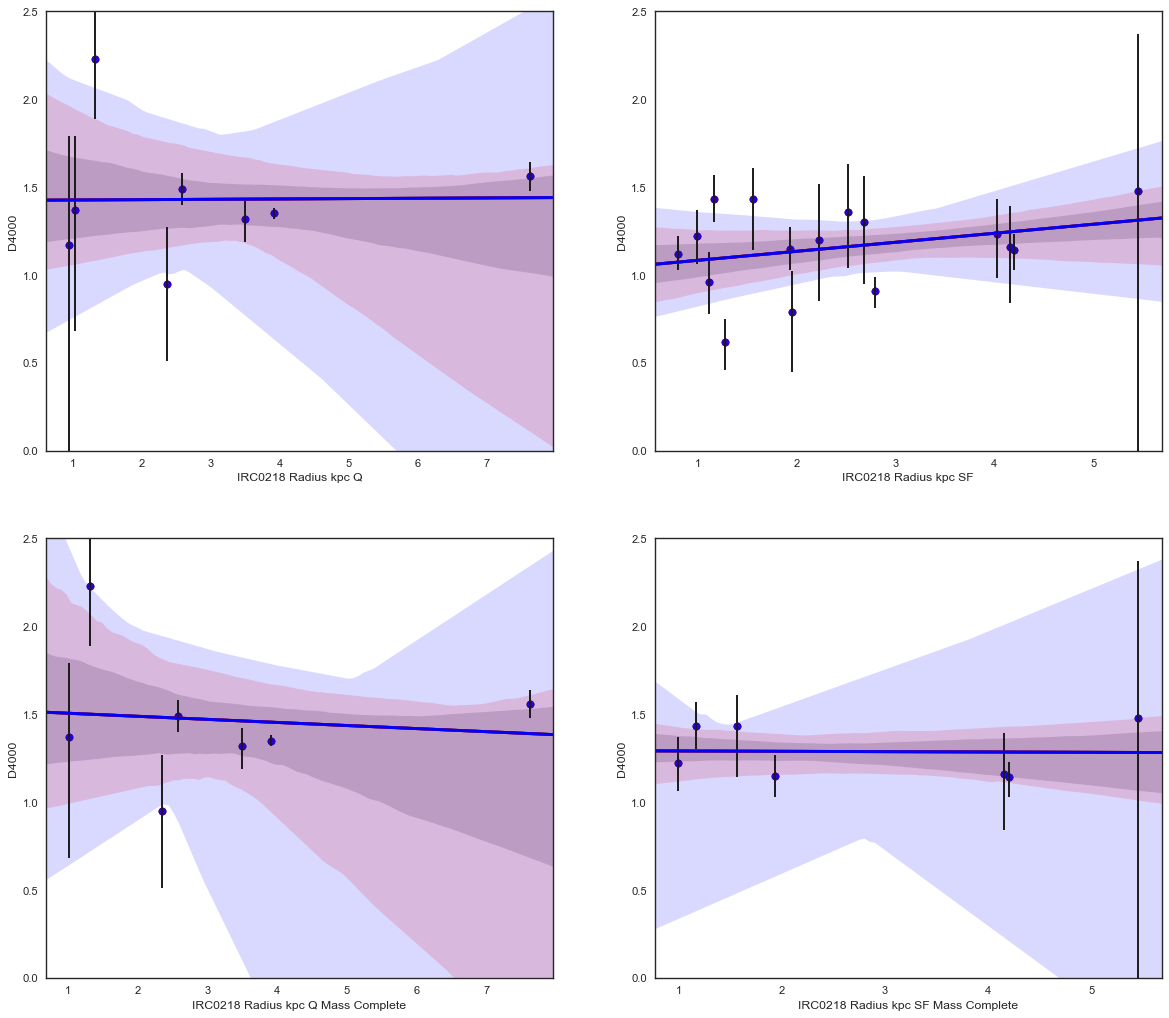

In [133]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='none', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_re_kpc[np.where(c_flag<0.9)], name="IRC0218 Radius kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
ax = ylim(0,2.5)
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_re_kpc[np.where(c_flag>0.9)], name="IRC0218 Radius kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
ax = ylim(0,2.5)
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 Radius kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
ax = ylim(0,2.5)
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 Radius kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
ax = ylim(0,2.5)
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

0.547619047619
0.473490427099
0.357142857143
-0.190909090909


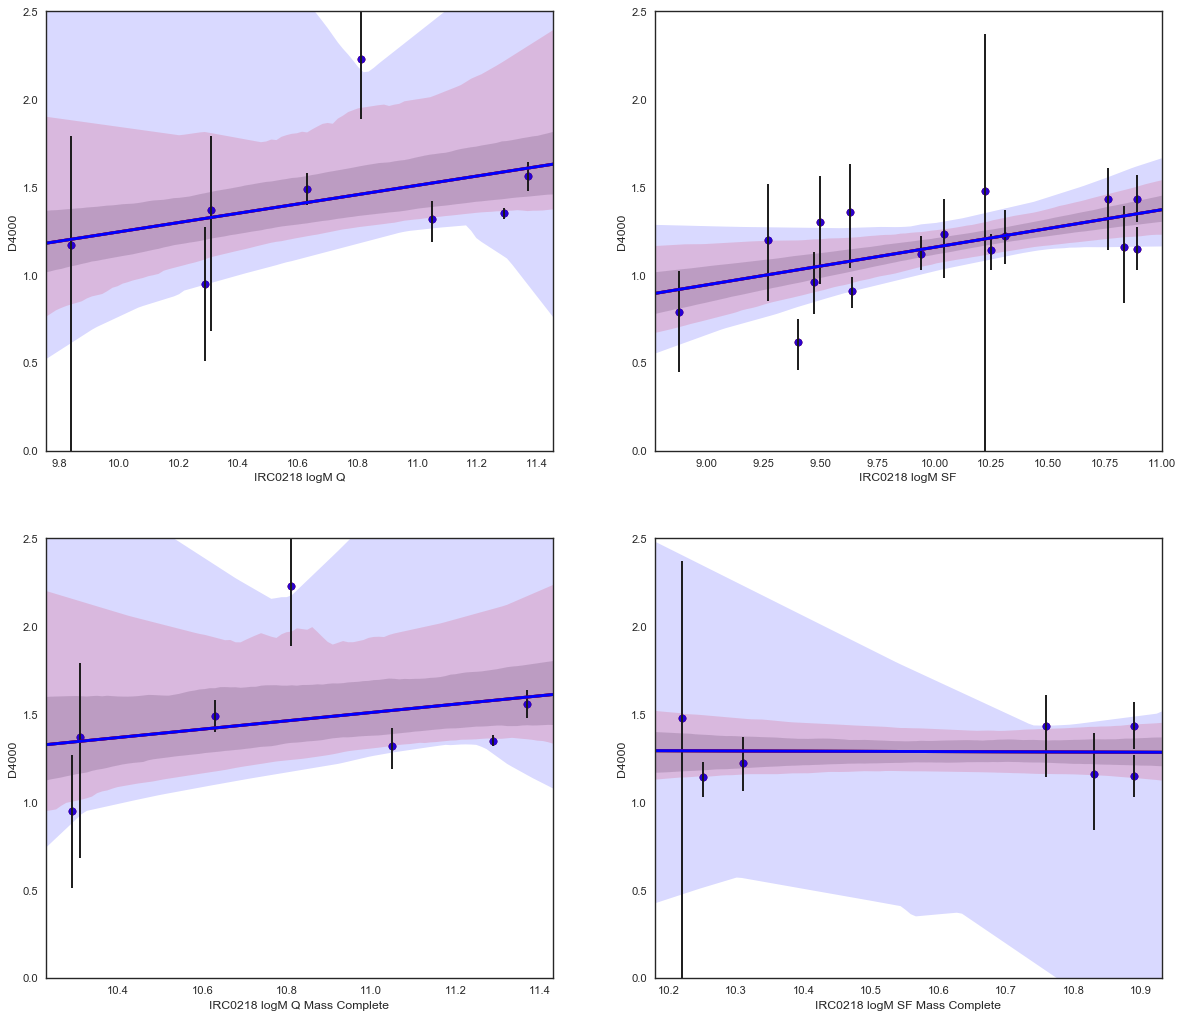

In [134]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)], name="IRC0218 logM Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)], name="IRC0218 logM SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 logM Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 logM SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

-0.0857142857143
-0.0721984697322
nan
0.0666666666667


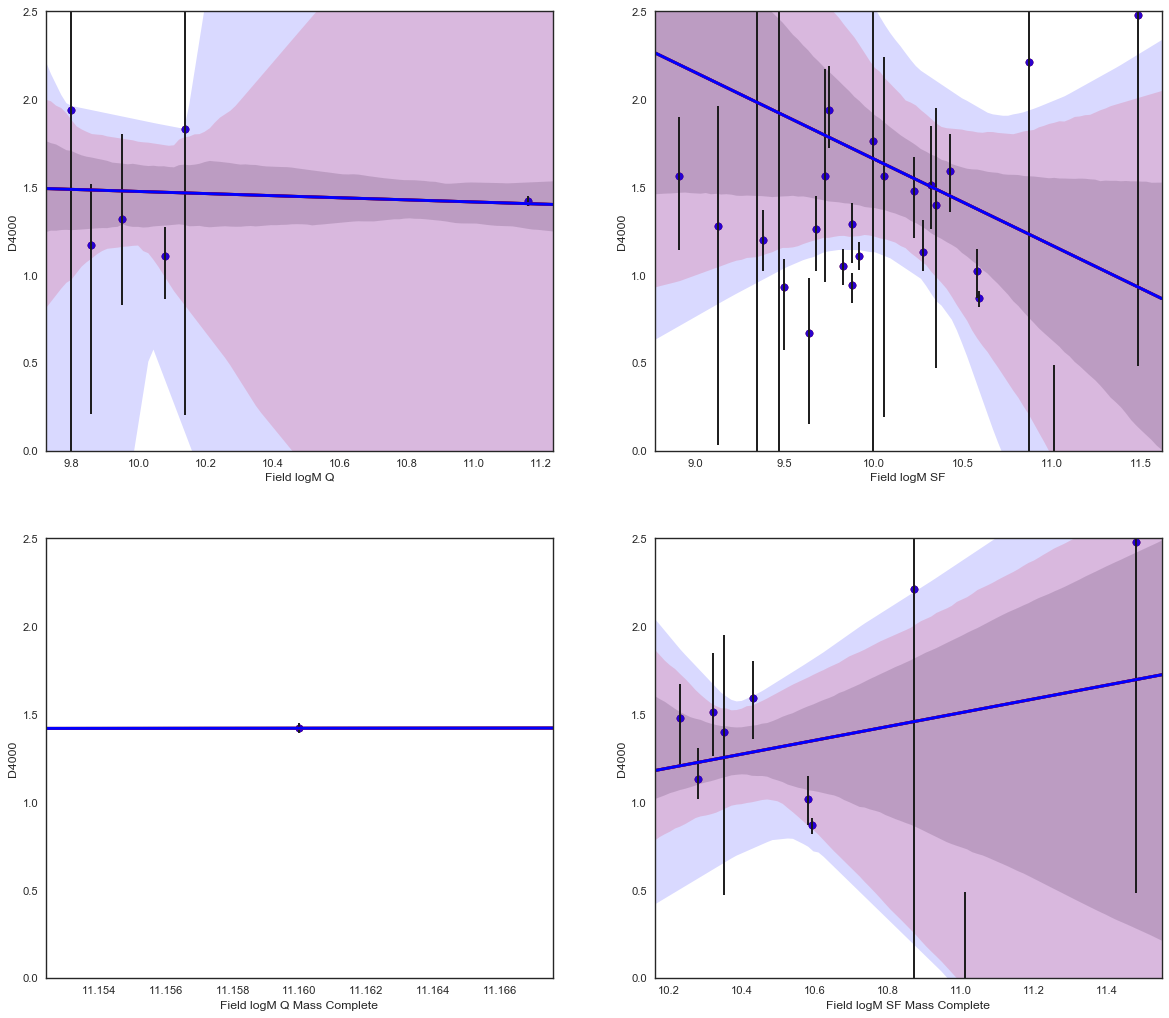

In [135]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(f_lmass[np.where(f_flag<0.9)], name="Field logM Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag<0.9)], f_dk_n[np.where(f_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(f_lmass[np.where(f_flag>0.9)], name="Field logM SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag>0.9)], f_dk_n[np.where(f_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(f_lmass[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field logM Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(f_lmass[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field logM SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

-0.238095238095
-0.201618891964
0.0357142857143
0.0900937462696


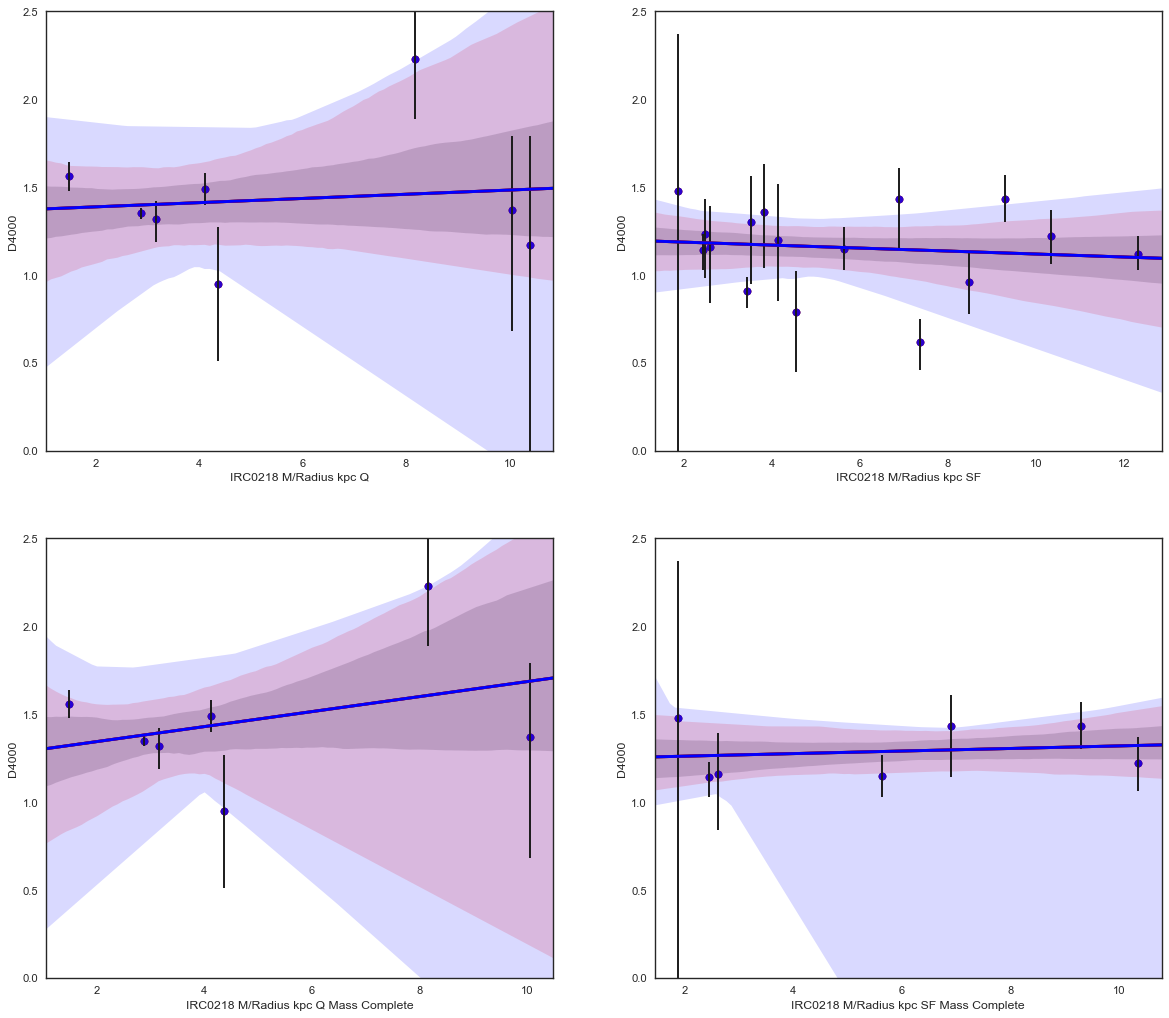

In [136]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)], name="IRC0218 M/Radius kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)], name="IRC0218 M/Radius kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 M/Radius kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 M/Radius kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

-0.238095238095
-0.201618891964
0.0357142857143
0.0900937462696


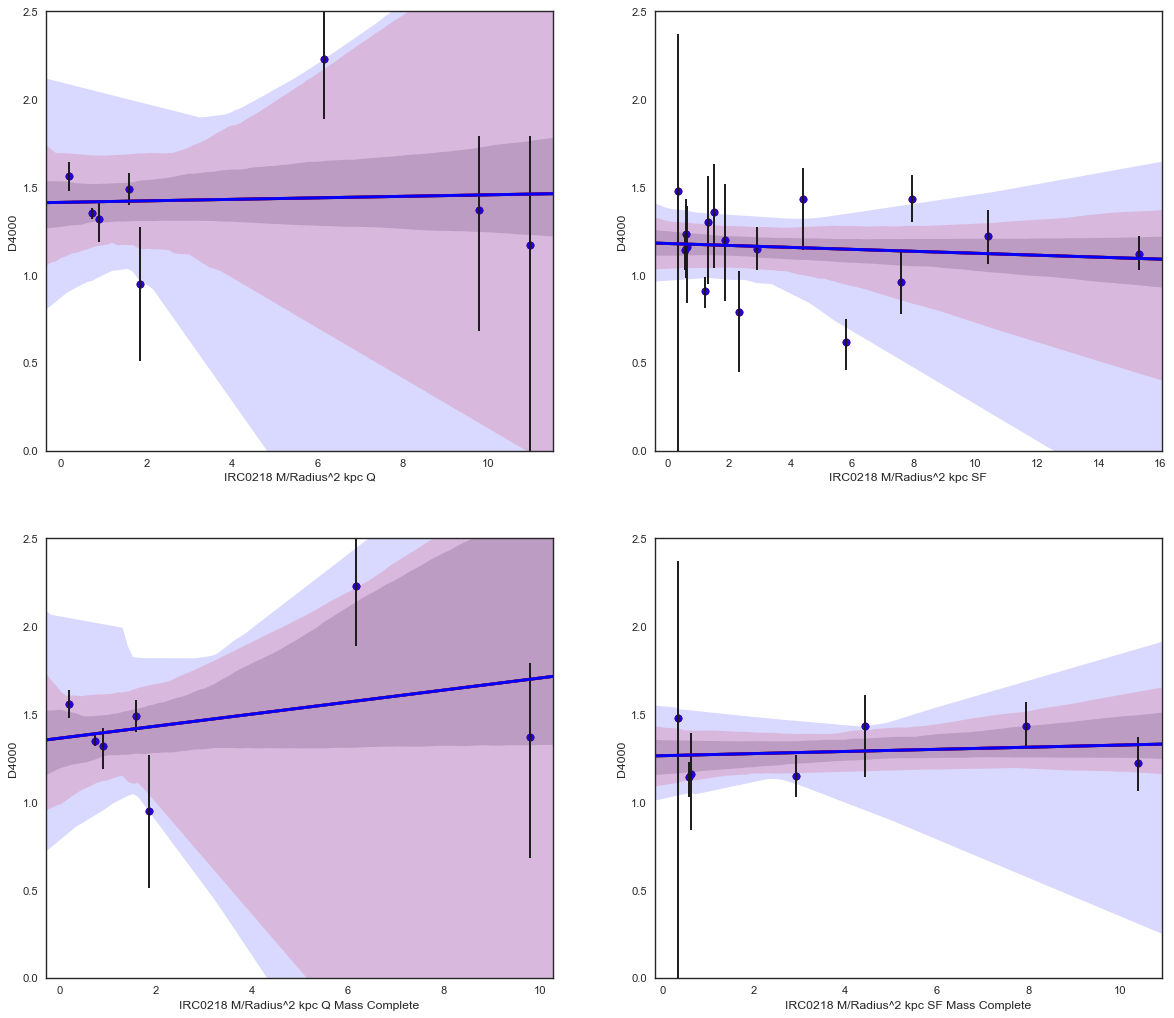

In [137]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)]**2, name="IRC0218 M/Radius^2 kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)]**2, name="IRC0218 M/Radius^2 kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]**2, name="IRC0218 M/Radius^2 kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]**2, name="IRC0218 M/Radius^2 kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

-0.238095238095
-0.223693953128
0.0357142857143
0.0900937462696


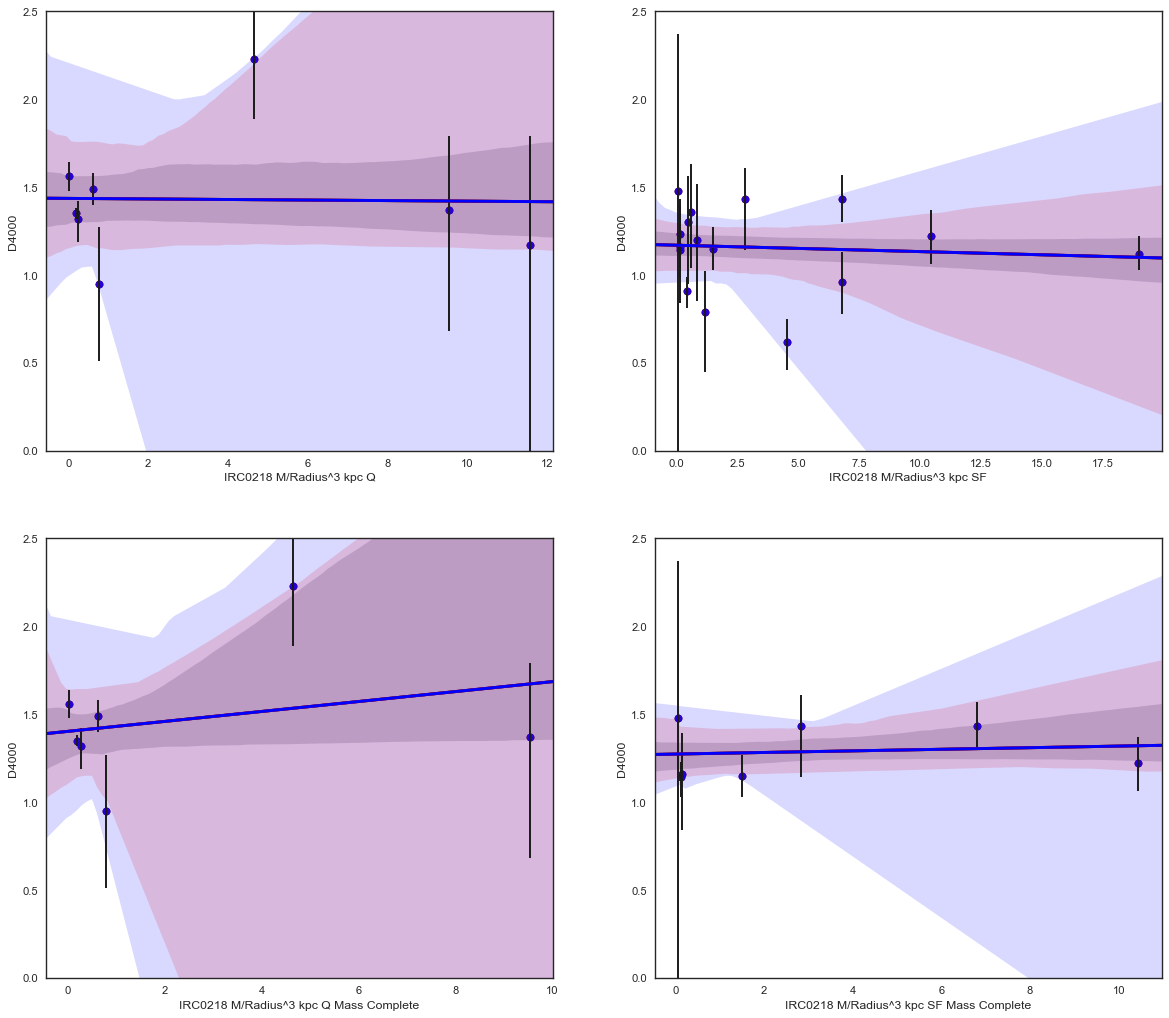

In [138]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)]**3, name="IRC0218 M/Radius^3 kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)]**3, name="IRC0218 M/Radius^3 kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]**3, name="IRC0218 M/Radius^3 kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]**3, name="IRC0218 M/Radius^3 kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

0.2
0.171399287471
nan
0.236363636364


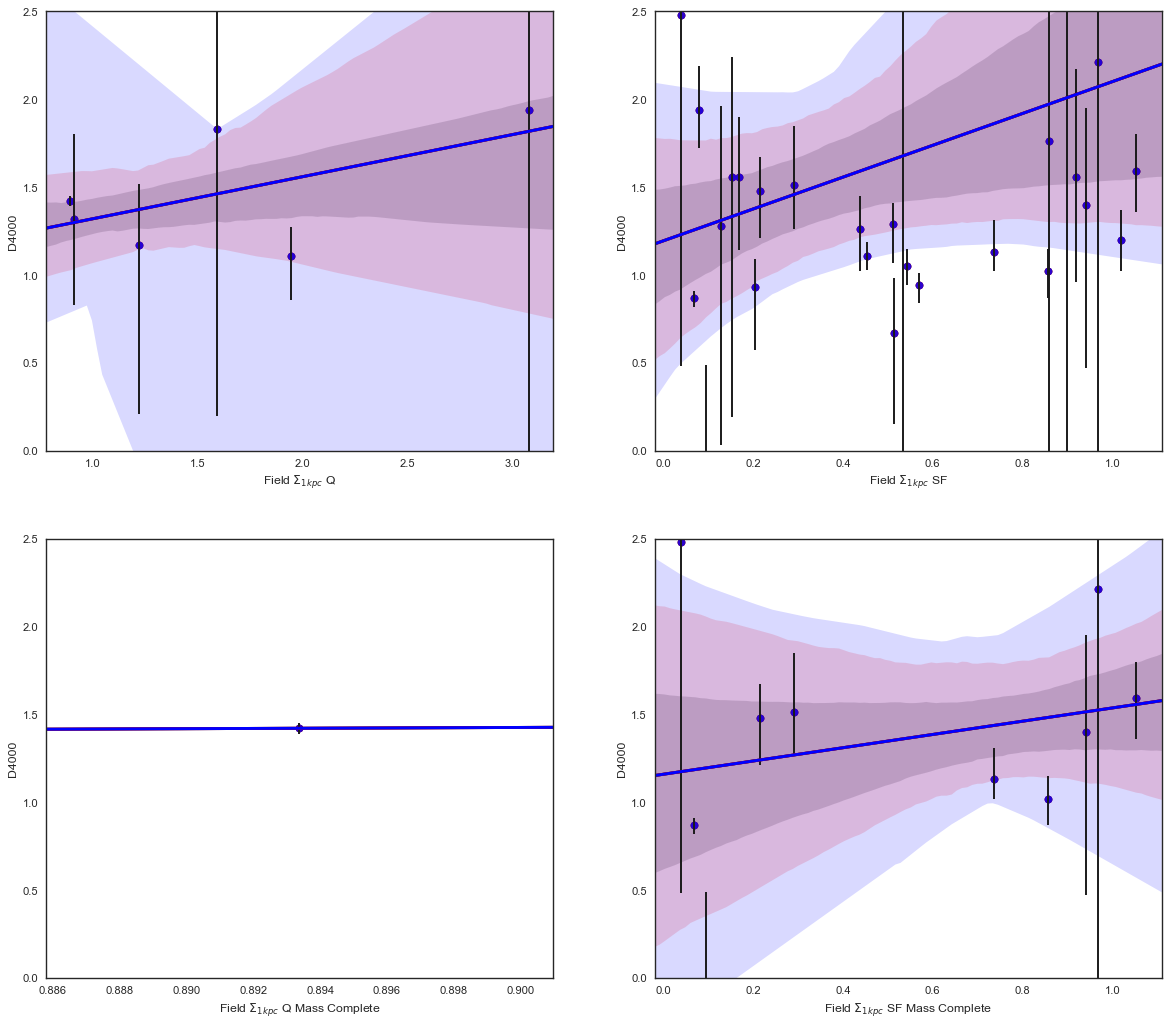

In [139]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(f_ssmd[np.where(f_flag<0.9)], name="Field $\Sigma_{1kpc}$ Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag<0.9)], f_dk_n[np.where(f_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(f_ssmd[np.where(f_flag>0.9)], name="Field $\Sigma_{1kpc}$ SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(f_flag>0.9)], f_dk_n[np.where(f_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(f_ssmd[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field $\Sigma_{1kpc}$ Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(f_ssmd[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field $\Sigma_{1kpc}$ SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[f_dk_p[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], f_dk_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()

-0.047619047619
-0.0971302691214
0.285714285714
0.0900937462696


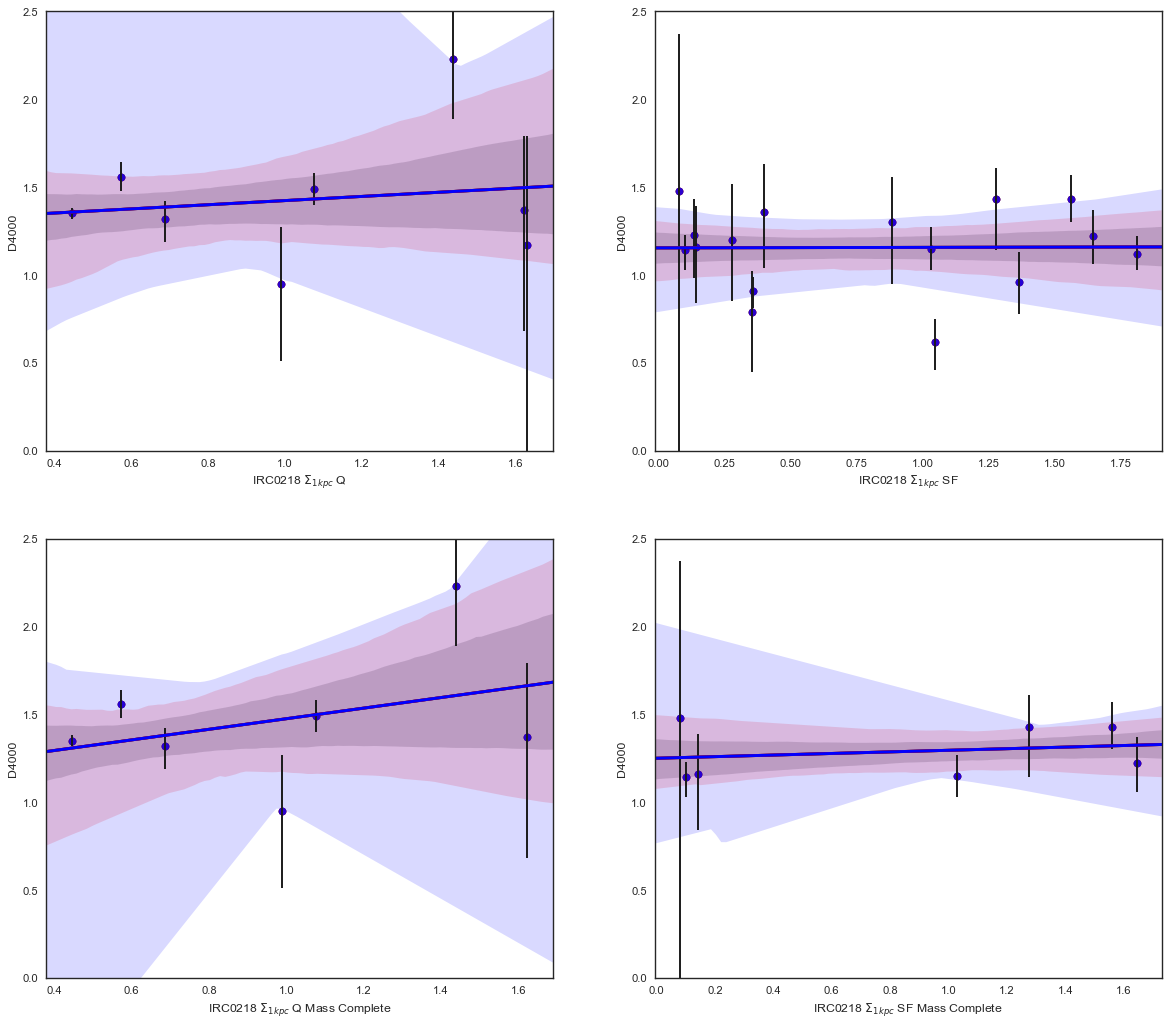

In [140]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
ax = ylim(0,2.5)
x, y = pd.Series(c_ssmd[np.where(c_flag<0.9)], name="IRC0218 $\Sigma_{1kpc}$ Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag<0.9)], c_dk2[np.where(c_flag<0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
ax = ylim(0,2.5)
x, y = pd.Series(c_ssmd[np.where(c_flag>0.9)], name="IRC0218 $\Sigma_{1kpc}$ SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(c_flag>0.9)], c_dk2[np.where(c_flag>0.9)]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
ax = ylim(0,2.5)
x, y = pd.Series(c_ssmd[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 $\Sigma_{1kpc}$ Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
ax = ylim(0,2.5)
x, y = pd.Series(c_ssmd[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 $\Sigma_{1kpc}$ SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = bar(x,y,yerr=[c_dk1[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], c_dk2[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]], facecolor='none')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = plt.show()
